In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [50]:
data = sns.load_dataset('tips')

In [51]:
X = data.drop(['tip'], axis=1)
y = data['tip']

X['sex'] = pd.factorize(x['sex'])[0]
X['smoker'] = pd.factorize(x['smoker'])[0]
X['time'] = pd.factorize(x['time'])[0]

X = pd.concat([X, pd.get_dummies(X['day'], prefix='day')], axis=1)

X.drop(['day'], axis=1, inplace=True)

In [52]:
# Data split 3:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [53]:
# Model creating
dectree = DecisionTreeRegressor(max_depth=3, random_state=21)
dectree.fit(X_train, y_train)
dectree.score(X_test, y_test)

0.5030373927358809

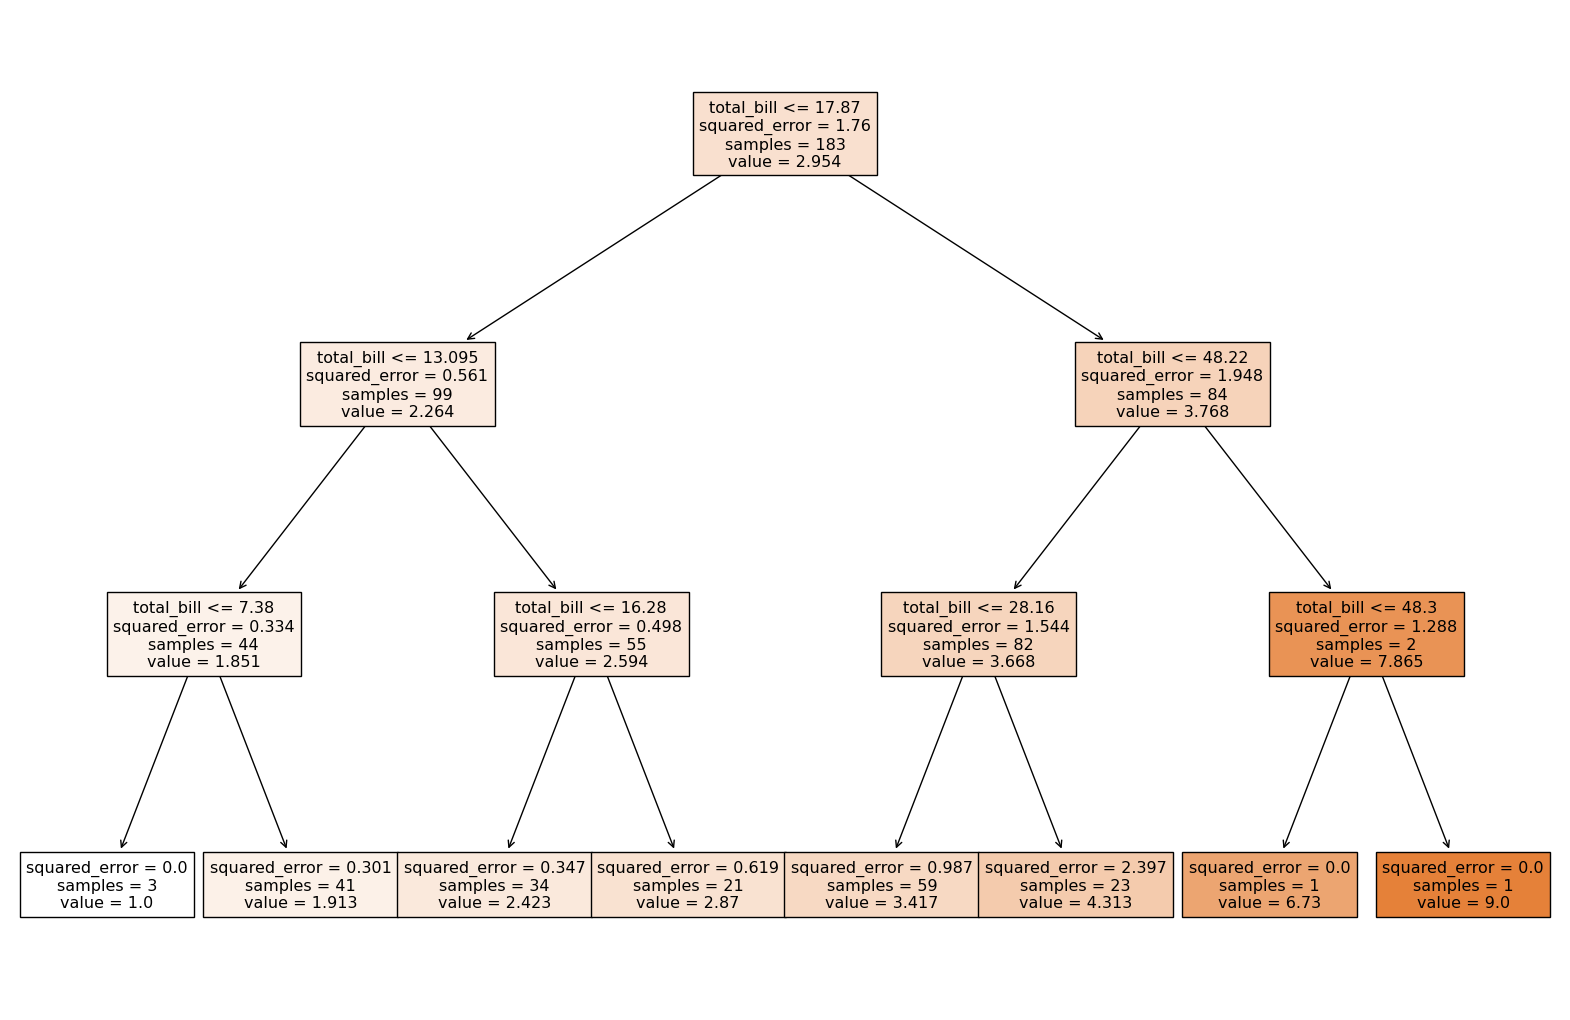

In [54]:
plt.figure(figsize=(20, 13))
plot_tree(dectree, filled=True, feature_names=X.columns)
plt.show()

In [55]:
rfc = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=21)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.47396900081127136

In [56]:
y_pred = rfc.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.7955995801866653

Text(0, 0.5, 'Предсказанные чаевые')

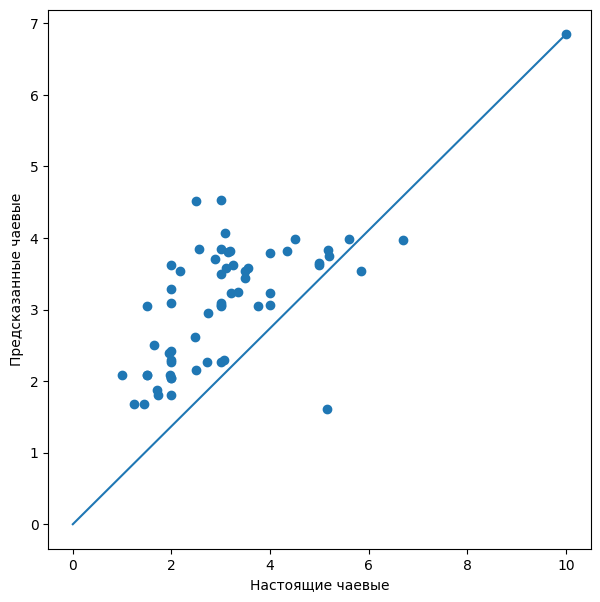

In [57]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_pred)])
plt.xlabel('Настоящие чаевые', fontsize=10)
plt.ylabel('Предсказанные чаевые', fontsize=10)